In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [131]:
# KNOWn bug in tikzplotlib: https://stackoverflow.com/questions/75900239/attributeerror-occurs-with-tikzplotlib-when-legend-is-plotted
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

## Extract results from sqlite database

NOTE: `stat_rss` is usually measured in 4 KiB memory pages, see meta.page_size in Data model for more details.

In [136]:
!sqlite3 procpath/memtest_py_nbatches1.sqlite \
    "select stat_pid, stat_ppid, avg(stat_rss / 1024.0 * 4), max(stat_rss / 1024.0 * 4) \
     from record \
     group by stat_pid" > procpath/memtest_py_nbatches1.csv

In [76]:
!sqlite3 procpath/memtest_py_nbatches10.sqlite \
    "select stat_pid, stat_ppid, avg(stat_rss / 1024.0 * 4), max(stat_rss / 1024.0 * 4) \
     from record \
     group by stat_pid" > procpath/memtest_py_nbatches10.csv

In [77]:
!sqlite3 procpath/memtest_py_nbatches20.sqlite \
    "select stat_pid, stat_ppid, avg(stat_rss / 1024.0 * 4), max(stat_rss / 1024.0 * 4) \
     from record \
     group by stat_pid" > procpath/memtest_py_nbatches20.csv

In [78]:
!sqlite3 procpath/memtest_r.sqlite \
    "select stat_pid, stat_ppid, avg(stat_rss / 1024.0 * 4), max(stat_rss / 1024.0 * 4) \
     from record \
     group by stat_pid" > procpath/maxmem_r.csv

## Shape and size of files
Calculated on the server from the `mem_bechmark_<num-cells>x<num-genes>.h5ad` files

In [33]:
files = [
    ((2865, 15778), 725306636),
    ((6303, 15778), 1593608405),
    ((1146, 15778), 291156038),
    ((8595, 15778), 2172566225),
    ((1719, 15778), 435894920),
    ((5157, 15778), 1304196116),
    ((3438, 15778), 870078542),
    ((4584, 15778), 1159490258),
    ((7449, 15778), 1883153363),
    ((2292, 15778), 580600778),
    ((4011, 15778), 1014784400),
    ((5730, 15778), 1448901974),
    ((9168, 15778), 2317272656),
    ((6876, 15778), 1738446932),
    ((8022, 15778), 2027859794)
]

files = sorted(files, key=lambda e: e[1])

## Convert to MebiByte sizes
file_sizes = [f[1] / 2**20 for f in files]
file_sizes

[277.66803550720215,
 415.70178985595703,
 553.7040500640869,
 691.7063102722168,
 829.7715587615967,
 967.7738189697266,
 1105.7760791778564,
 1243.7783393859863,
 1381.7805995941162,
 1519.7834062576294,
 1657.9121894836426,
 1795.9149961471558,
 1933.917802810669,
 2071.920609474182,
 2209.9234161376953]

## Read CSVs

In [79]:
header = ["PID", "PPID", "MeanRSS", "MaxRSS"]

### Py: 1 Batch

In [137]:
#TODO
res_py_1batch = pd.read_csv("procpath/memtest_py_nbatches1.csv", sep="|", header=None)
res_py_1batch.columns = header
res_py_1batch

,PID,PPID,MeanRSS,MaxRSS
0,1,0,12.945312,12.945312
1,190083,1,7.289062,7.289062
2,818434,190083,8.867188,8.867188
3,818540,818434,5.699219,5.699219
4,818541,818540,4.960938,4.960938
5,818550,818541,3.078125,3.078125
6,818551,818550,2.554688,2.554688
7,818552,818551,4.972656,4.972656
8,818563,818552,41.355469,41.355469
9,818570,818563,5.285156,5.285156


In [138]:
sub_py_1batch = res_py_1batch[res_py_1batch.PPID == 818751]

### Py: 10 batches

In [80]:
res_py_10batches = pd.read_csv("procpath/memtest_py_nbatches10.csv", sep="|", header=None)
res_py_10batches.columns = header
res_py_10batches

,PID,PPID,MeanRSS,MaxRSS
0,1,0,12.945312,12.945312
1,570239,1,3.269531,3.269531
2,570240,570239,5.183594,5.183594
3,570255,570240,41.570312,41.570312
4,570262,570255,6.097656,6.097656
5,776694,570262,3.273438,3.273438
6,776695,776694,1017.970662,1123.238281
7,776696,776694,1396.428940,1551.027344
8,776697,776694,1776.104958,1985.027344
9,776698,776694,2146.783637,2409.660156


In [81]:
sub_py_10batches = res_py[res_py.PPID == 776694]

### Py: 20 batches

In [82]:
res_py_20batches = pd.read_csv("procpath/memtest_py_nbatches20.csv", sep="|", header=None)
res_py_20batches.columns = header
res_py_20batches

,PID,PPID,MeanRSS,MaxRSS
0,1,0,12.945312,12.945312
1,570239,1,3.269531,3.269531
2,570240,570239,5.183594,5.183594
3,570255,570240,41.570312,41.570312
4,570262,570255,6.074219,6.074219
5,809081,570262,3.378906,3.378906
6,809082,809081,835.693635,894.992188
7,809083,809081,1135.025264,1220.714844
8,809084,809081,1430.018135,1546.789062
9,809085,809081,1728.983766,1871.804688


In [83]:
sub_py_20batches = res_py_20batches[res_py_20batches.PPID == 810990]

### R

In [84]:
res_r = pd.read_csv("procpath/maxmem_r.csv", sep="|", header=None)
res_r.columns = header

In [85]:
# contains two experiments
sub_r = res_r[res_r["PPID"] == 801599]
sub_r

,PID,PPID,MeanRSS,MaxRSS
6,801600,801599,3946.529374,6888.675781
7,801601,801599,5413.429461,8448.480469
8,801602,801599,6645.092389,10692.371094
9,801603,801599,7724.530351,13058.218750
10,801604,801599,7999.391429,14855.890625
11,801605,801599,8622.206722,18153.980469
12,801606,801599,9372.531810,20554.726562
13,801608,801599,10367.047579,22984.250000
14,801609,801599,11706.875386,24842.765625
15,801610,801599,12143.973676,26575.410156


## Plot it

In [139]:
n = len(file_sizes)
d = pd.DataFrame.from_dict({
    "Method": np.concatenate([["R"] * n, ["Py_20Batches"] * n, ["Py_10Batches"] * n, ["Py_1Batch"] * n]),
    "MaxRSS": np.concatenate([sub_r.MaxRSS, sub_py_20batches.MaxRSS, sub_py_10batches.MaxRSS, sub_py_1batch.MaxRSS]),
    "FileSize": np.concatenate([file_sizes, file_sizes, file_sizes, file_sizes])
})

d.to_csv("results_filtered.csv")

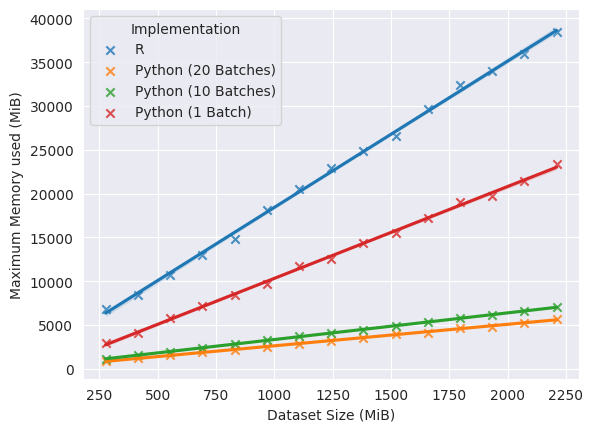

In [140]:
import seaborn as sns
import tikzplotlib
sns.set_style('darkgrid')

fig, (ax) = plt.subplots(1, 1)
sns.regplot(data=d[d["Method"] == "R"], x="FileSize", y="MaxRSS", marker="x", label="R", ax=ax)
sns.regplot(data=d[d["Method"] == "Py_20Batches"], x="FileSize", y="MaxRSS", marker="x", label="Python (20 Batches)", ax=ax)
sns.regplot(data=d[d["Method"] == "Py_10Batches"], x="FileSize", y="MaxRSS", marker="x", label="Python (10 Batches)", ax=ax)
sns.regplot(data=d[d["Method"] == "Py_1Batch"], x="FileSize", y="MaxRSS", marker="x", label="Python (1 Batch)", ax=ax)
ax.legend(title="Implementation")
ax.set_xlabel("Dataset Size (MiB)")
ax.set_ylabel("Maximum Memory used (MiB)")

tikzplotlib_fix_ncols(fig)
tikzplotlib.save("tikz/plot_compare_memusage.tex")

In [133]:
!cat tikz/plot_compare_memusage.tex

% This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{darkorange25512714}{RGB}{255,127,14}
\definecolor{darkslategray38}{RGB}{38,38,38}
\definecolor{forestgreen4416044}{RGB}{44,160,44}
\definecolor{lavender234234242}{RGB}{234,234,242}
\definecolor{lightgray204}{RGB}{204,204,204}
\definecolor{steelblue31119180}{RGB}{31,119,180}

\begin{axis}[
axis background/.style={fill=lavender234234242},
axis line style={white},
legend cell align={left},
legend style={
  fill opacity=0.8,
  draw opacity=1,
  text opacity=1,
  at={(0.03,0.97)},
  anchor=north west,
  draw=lightgray204,
  fill=lavender234234242
},
tick align=outside,
x grid style={white},
xlabel=\textcolor{darkslategray38}{Dataset Size (MiB)},
xmajorgrids,
xmajorticks=false,
xmin=181.055266475677, xmax=2306.53618516922,
xtick style={color=darkslategray38},
y grid style={white},
ylabel=\textcolor{darkslategray38}{Maximum Memory used (MiB)},
ymajorgrids,
ymajorticks=false,
ymin=-1119.09843230675, ymax=41050.